---

# Intraday (and other) major tick settings (Issue # 74)

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
df = pd.read_csv('../../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df.shape
df.head(2)
df.tail(2)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.9b6'

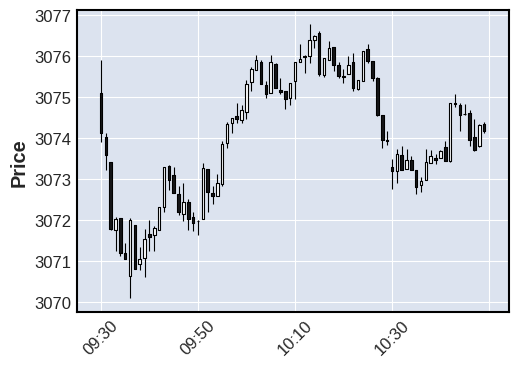

In [5]:
idf = pd.read_csv('../../data/SP500_20191106_IDayBollinger.csv',index_col=0,parse_dates=True)
setup=dict(type='candle',figscale=0.75)

mpf.plot(idf.iloc[0:80],**setup,show_nontrading=False)


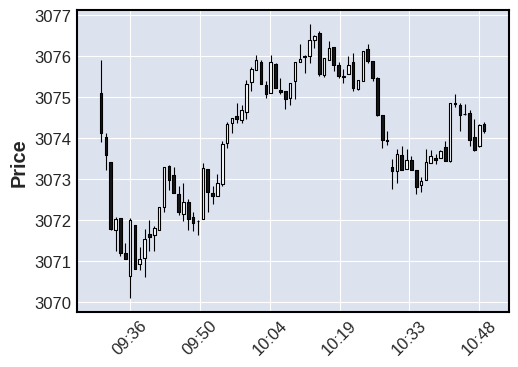

In [6]:
fig, axlist = mpf.plot(idf.iloc[0:80],**setup,show_nontrading=True,returnfig=True)

In [7]:
axlist

[<Axes: ylabel='Price'>, <Axes: >]

In [8]:
#idf.index[0]
#dir(idf.index[0])
tlist=[]
for ix,ts in enumerate(idf.index[0:80]):
    if ts.minute % 15 == 0:
        print(ix,ts)
        tlist.append(ts)

0 2019-11-06 09:30:00
15 2019-11-06 09:45:00
30 2019-11-06 10:00:00
45 2019-11-06 10:15:00
60 2019-11-06 10:30:00
75 2019-11-06 10:45:00


In [9]:
#axlist[0].set_xticks([0,30,60])
axlist[0].set_xticks(tlist)

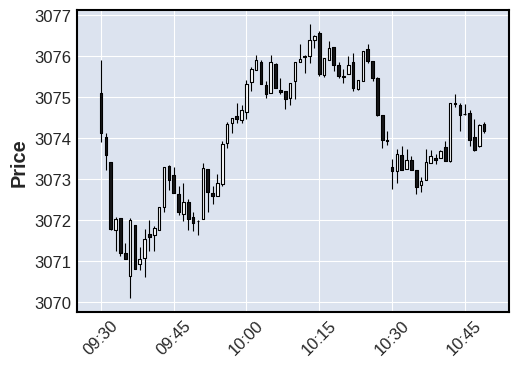

In [10]:
fig

In [11]:
import mplfinance as mpf
import yfinance as yf
import datetime

df = yf.download('DIA',start='2022-11-07',end='2022-11-15',interval='15m')

[*********************100%***********************]  1 of 1 completed


In [12]:
#df

In [13]:
# dates = sorted(list(set([d.date() for d in df.index])))
# dates
# t = df.index[0]
# t
# t.date()
# t.hour
# t.minute

In [91]:
ticks = []
tlabs = []
mitks = []
milab = []
dates = sorted(list(set([d.date() for d in df.index])))
for d1 in dates:
    # Major Ticks:
    d2 = d1 + datetime.timedelta(days=1)
    ts = df.loc[d1:d2].index[0]
    ticks.append(df.index.get_loc(ts))
    tlabs.append('\n'+d1.strftime('%b %d'))
    # Minor Ticks:
    mitks.append(ticks[-1]+0.1)
    milab.append('09:30')
    ts = df.loc[str(d1)+' 13:00':d2].index[0]
    mitks.append(df.index.get_loc(ts))
    milab.append('13:00')

In [92]:
%%capture
fig, axlist = mpf.plot(df,type='candle',xrotation=0,style='yahoo',tight_layout=True,returnfig=True,figratio=(2,1))
axlist[-2].set_xticks(ticks)
axlist[-2].set_xticklabels(tlabs, ha='left')
axlist[-2].set_xticks(mitks,minor=True)
axlist[-2].set_xticklabels(milab, ha='center', minor=True, rotation=0)
#axlist[-2].tick_params(axis='x',which='minor',length=0)

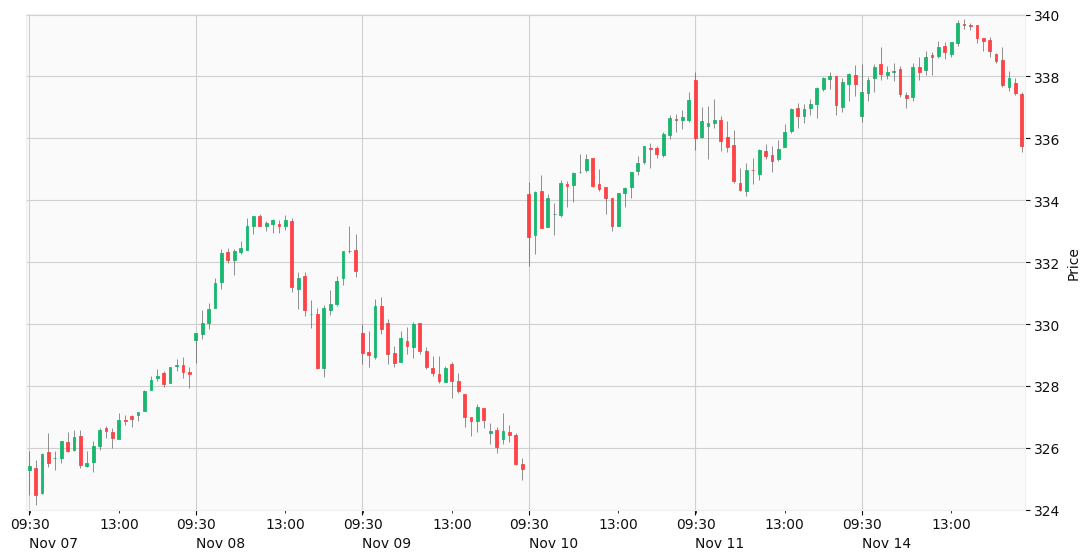

In [93]:
fig

In [94]:
fig.savefig('ticks_issue573_02.pdf',bbox_inches='tight')

In [17]:
STOP HERE

SyntaxError: invalid syntax (3031286301.py, line 1)

In [ ]:
mpf.plot(idf.iloc[0:40],type='candle')
mpf.plot(idf.iloc[0:40],type='candle',update_width_config=dict(candle_linewidth=1.75))

In [ ]:
mpf.plot(idf.iloc[0:40],type='candle',update_width_config=dict(candle_linewidth=0.4))

In [ ]:
mpf.plot(idf.iloc[0:40],type='candle',update_width_config=dict(candle_linewidth=0.4,candle_width=1.6))